In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [32]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load your data

In [33]:
# labels for the columns
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans",
        "fAlpha", "fDist", "class"]

# read the data from our dataset
df = pd.read_csv("magic04.data", names=cols)

# unique data in column "class"
df["class"].unique()

# converting the value for "g" to int
# 'g' is for gamma and 'h' ias for hadron
df["class"] = (df["class"] == "g").astype(int)

# 1. Basic Dataset Information

In [34]:
print("1. DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")
print("\nData types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())


1. DATASET OVERVIEW
Dataset shape: (19020, 11)
Features: ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

Data types:
fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class         int64
dtype: object

First 5 rows:
    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  

# 2. Statistical Summaries

In [35]:
print("\n\n2. STATISTICAL SUMMARIES")
print("=" * 50)

# Overall summary
print("Overall Statistical Summary:")
print(df.describe())

# Summary by class
print("\n\nStatistical Summary by Class:")
print("\nGamma particles (class = 1):")
print(df[df['class'] == 1].describe())
print("\nHadron particles (class = 0):")
print(df[df['class'] == 0].describe())



2. STATISTICAL SUMMARIES
Overall Statistical Summary:
            fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      -4.331745     10.545545      0.249726     27.645707    193.81802

# 3. Missing Value Analysis



3. MISSING VALUE ANALYSIS
Missing Values Summary:


,Column,Missing Count,Missing Percentage
0,fLength,0,0.0
1,fWidth,0,0.0
2,fSize,0,0.0
3,fConc,0,0.0
4,fConc1,0,0.0
5,fAsym,0,0.0
6,fM3Long,0,0.0
7,fM3Trans,0,0.0
8,fAlpha,0,0.0
9,fDist,0,0.0


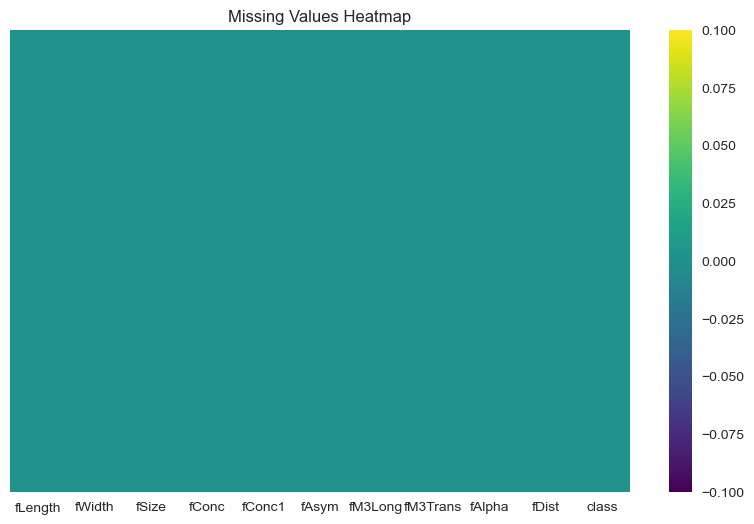

In [36]:
print("\n\n3. MISSING VALUE ANALYSIS")
print("=" * 50)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

print("Missing Values Summary:")
display(missing_df)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 4. Class Distribution Analysis



4. CLASS DISTRIBUTION ANALYSIS
Class Distribution:
Hadron (0): 6688 samples (35.16%)
Gamma (1): 12332 samples (64.84%)
Imbalance Ratio: 1.84


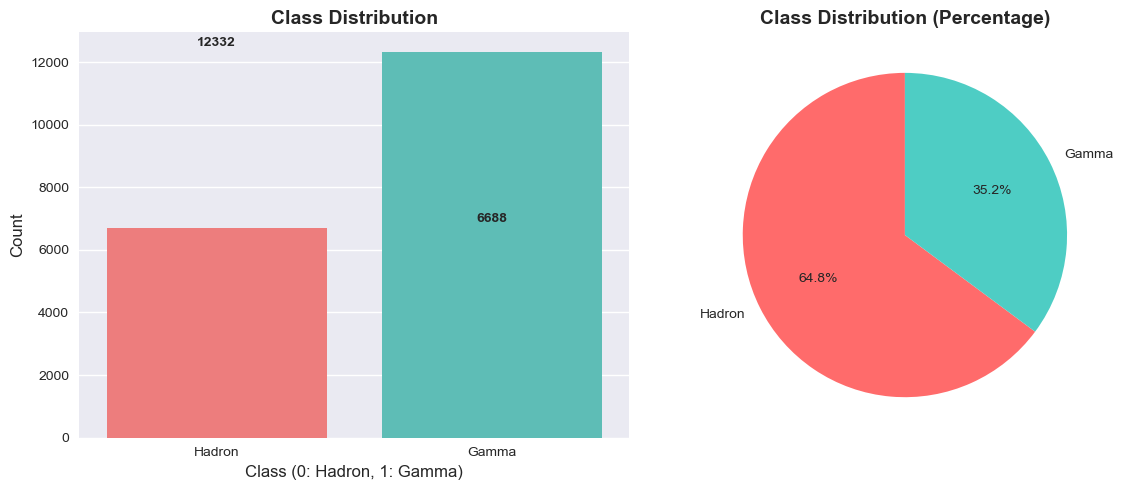

In [37]:
print("\n\n4. CLASS DISTRIBUTION ANALYSIS")
print("=" * 50)

class_counts = df['class'].value_counts()
class_percentages = df['class'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"Hadron (0): {class_counts[0]} samples ({class_percentages[0]:.2f}%)")
print(f"Gamma (1): {class_counts[1]} samples ({class_percentages[1]:.2f}%)")
print(f"Imbalance Ratio: {class_counts[1]/class_counts[0]:.2f}")

# ========================================
# SEABORN
# ========================================

# This version is more reliable and looks professional
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Seaborn count plot
sns.countplot(data=df, x='class', palette=['#FF6B6B', '#4ECDC4'], ax=ax1)
ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Class (0: Hadron, 1: Gamma)', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(['Hadron', 'Gamma'])

# Add count labels
for i, count in enumerate(class_counts.values):
    ax1.text(i, count + 100, str(count), ha='center', va='bottom', fontweight='bold')

# Simple pie chart
ax2.pie(class_counts.values, labels=['Hadron', 'Gamma'], autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4'], startangle=90)
ax2.set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Correlation Analysis



5. CORRELATION ANALYSIS


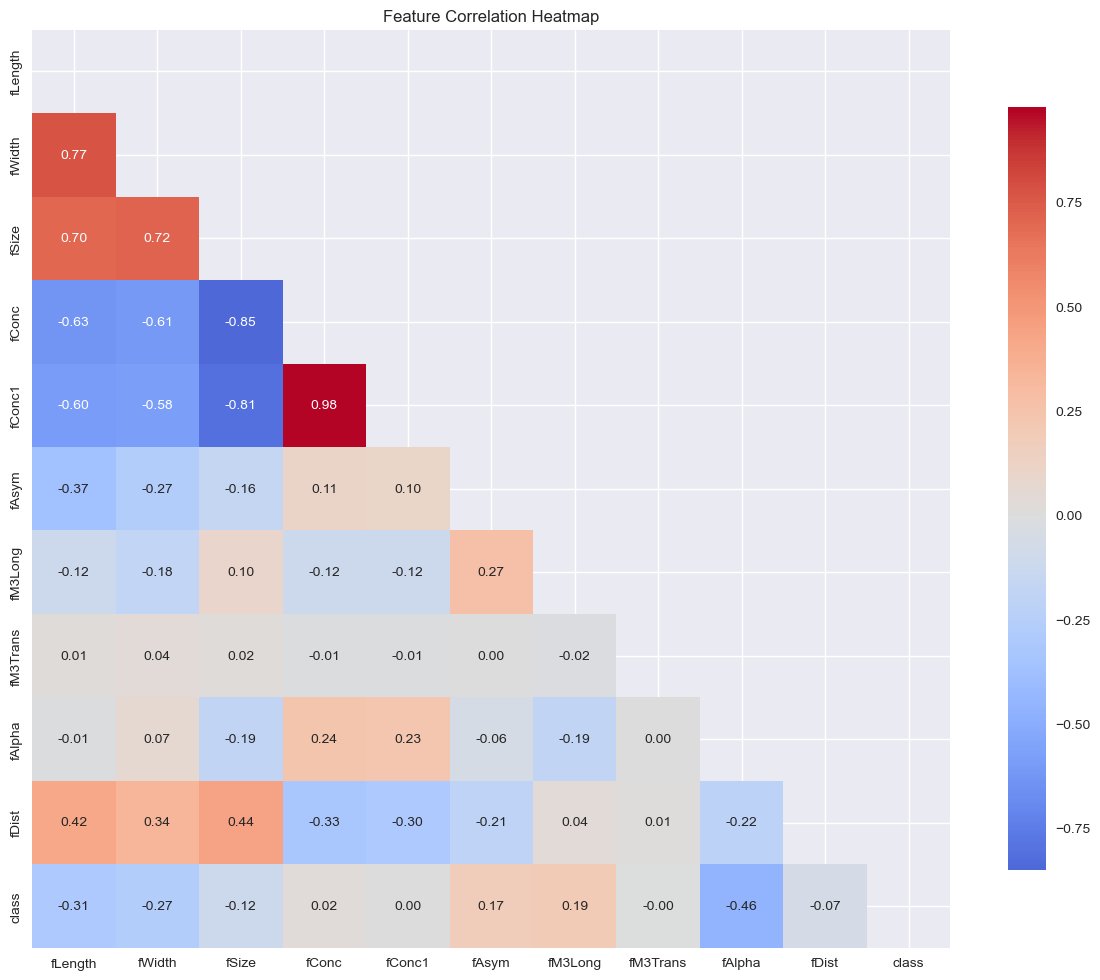

Highly Correlated Feature Pairs (|correlation| > 0.7):


,Feature 1,Feature 2,Correlation
0,fLength,fWidth,0.770512
1,fLength,fSize,0.702454
2,fWidth,fSize,0.717517
3,fSize,fConc,-0.850850
4,fSize,fConc1,-0.808835
5,fConc,fConc1,0.976412


In [38]:
print("\n\n5. CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Find highly correlated features
print("Highly Correlated Feature Pairs (|correlation| > 0.7):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    display(high_corr_df)
else:
    print("No highly correlated feature pairs found.")

# 6. Feature Distribution Analysis



6. FEATURE DISTRIBUTION ANALYSIS


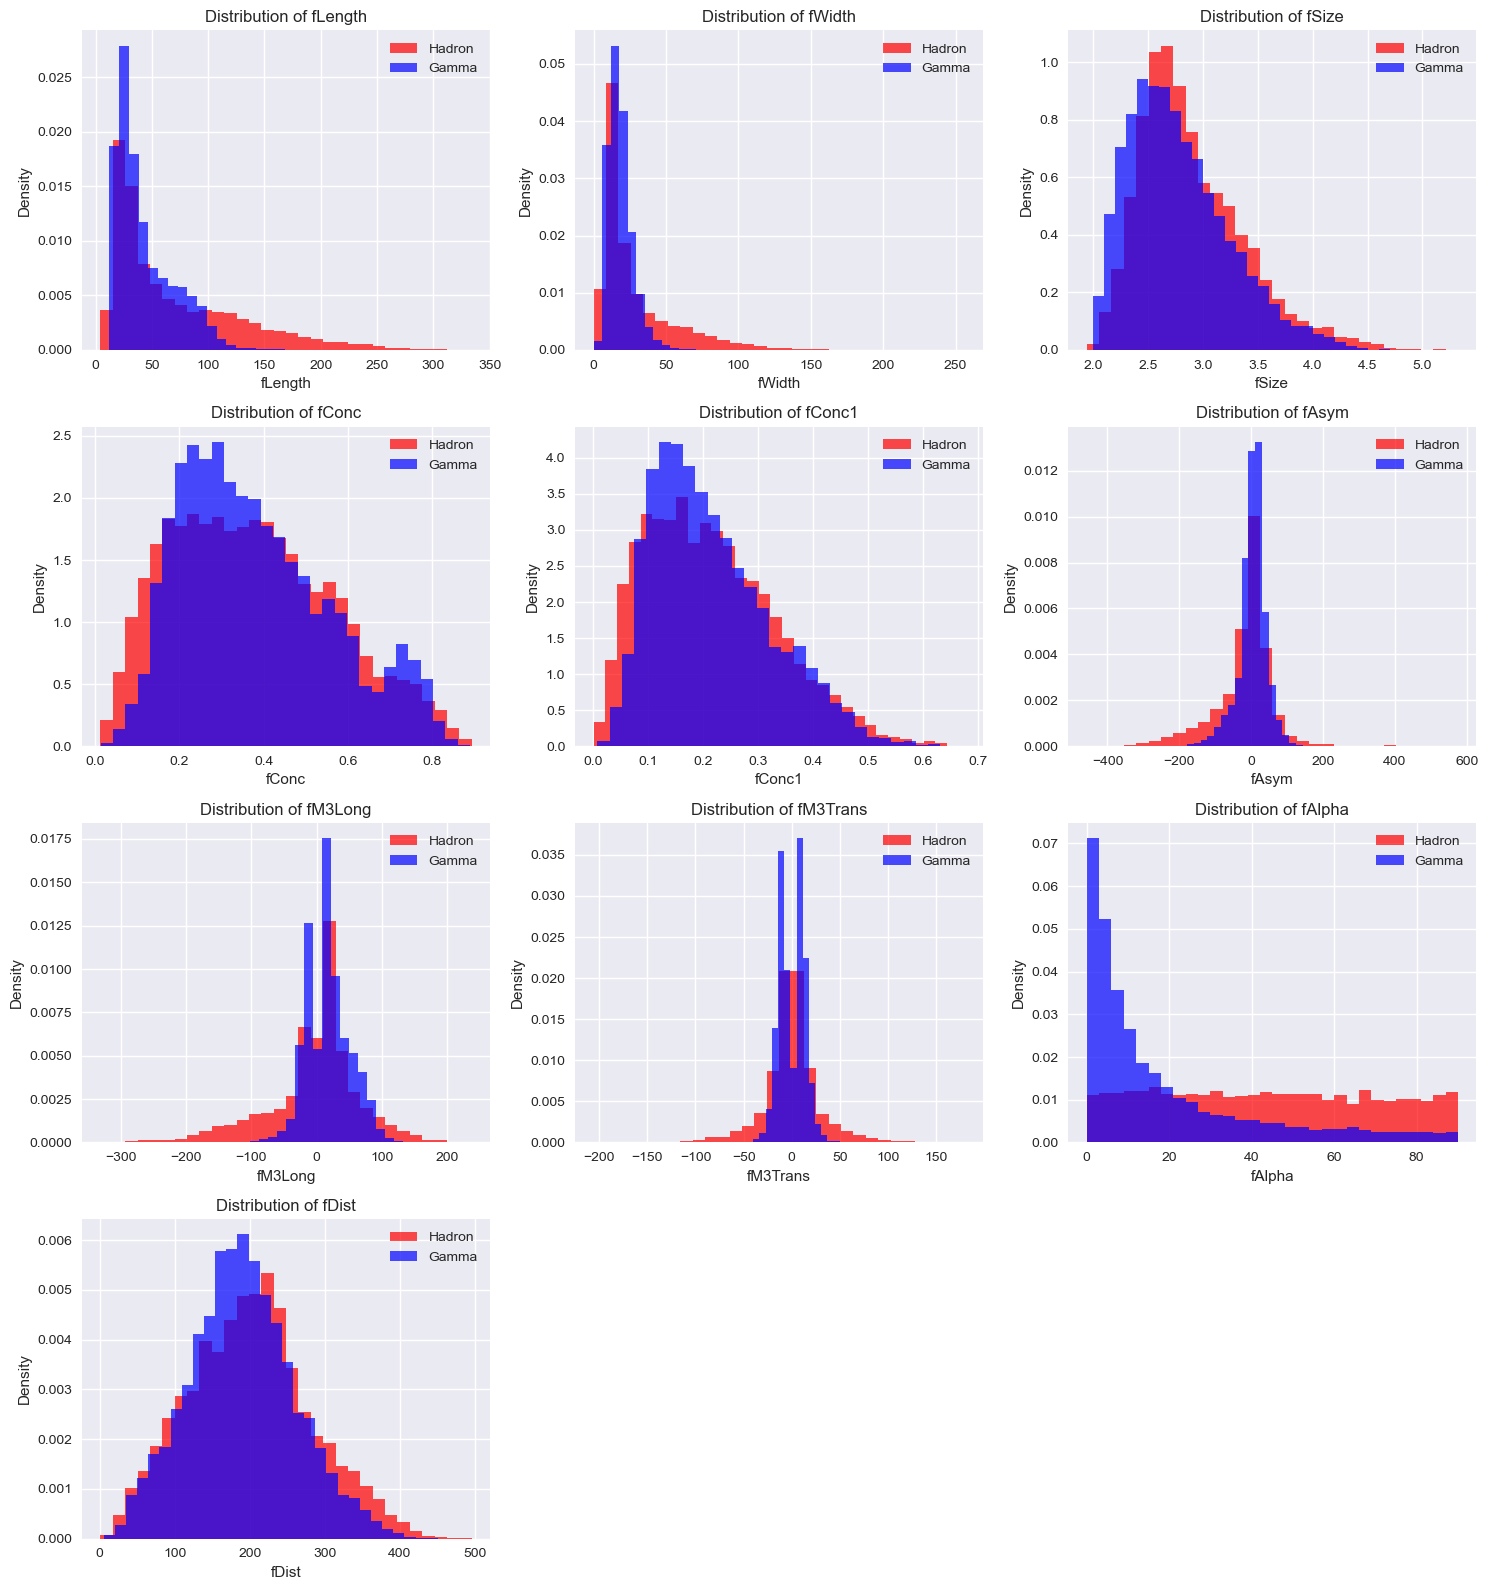

In [39]:
print("\n\n6. FEATURE DISTRIBUTION ANALYSIS")
print("=" * 50)

# Plot distributions for all features
feature_cols = [col for col in df.columns if col != 'class']
n_cols = 3
n_rows = (len(feature_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Plot distributions for both classes
    df[df['class'] == 0][col].hist(alpha=0.7, label='Hadron', color='red', density=True, bins=30)
    df[df['class'] == 1][col].hist(alpha=0.7, label='Gamma', color='blue', density=True, bins=30)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# 7. Outlier Detection



7. OUTLIER DETECTION WITH BOX PLOTS


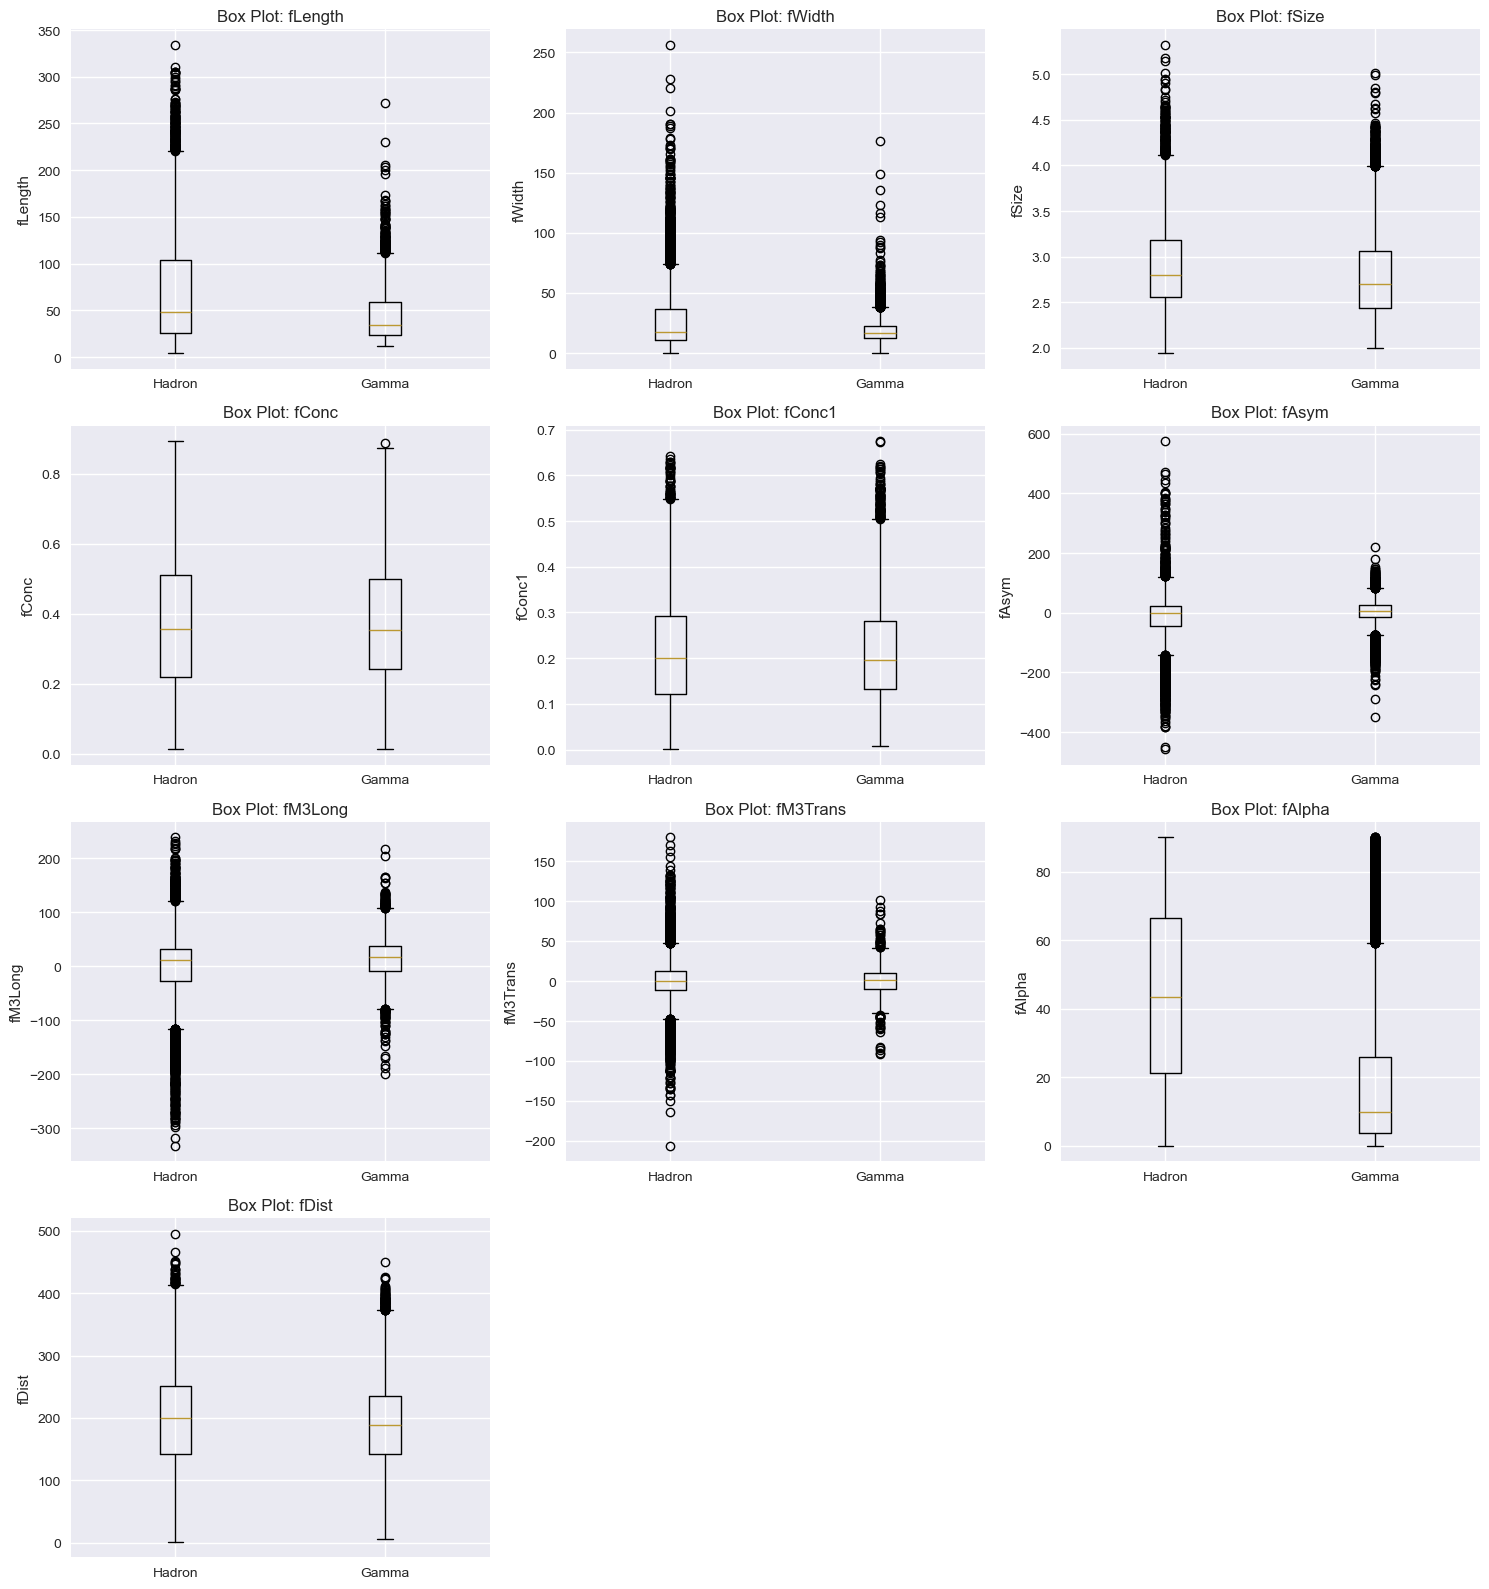

Outlier Detection Summary (using IQR method):


,Feature,Outlier Count,Outlier Percentage,Lower Bound,Upper Bound
0,fLength,971,5.105152,-44.343262,138.801437
1,fWidth,1546,8.128286,-7.449712,44.052988
2,fSize,367,1.929548,1.540350,4.038350
3,fConc,0,0.000000,-0.166050,0.905550
4,fConc1,150,0.788644,-0.106650,0.520350
5,fAsym,1781,9.363828,-87.561925,91.039075
6,fM3Long,1218,6.403785,-85.863638,108.858663
7,fM3Trans,850,4.468980,-43.543075,43.640125
8,fAlpha,0,0.000000,-54.955513,106.386988
9,fDist,128,0.672976,-4.615112,387.671187


In [40]:
print("\n\n7. OUTLIER DETECTION WITH BOX PLOTS")
print("=" * 50)

plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Create box plot by class
    box_data = [df[df['class'] == 0][col], df[df['class'] == 1][col]]
    plt.boxplot(box_data, labels=['Hadron', 'Gamma'])
    plt.title(f'Box Plot: {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Detect outliers using IQR method
print("Outlier Detection Summary (using IQR method):")
outlier_summary = []

for col in feature_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outlier Count': len(outliers),
        'Outlier Percentage': outlier_percentage,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

# 8. Feature Relationships (Pair Plots)



8. FEATURE RELATIONSHIPS (PAIR PLOTS)


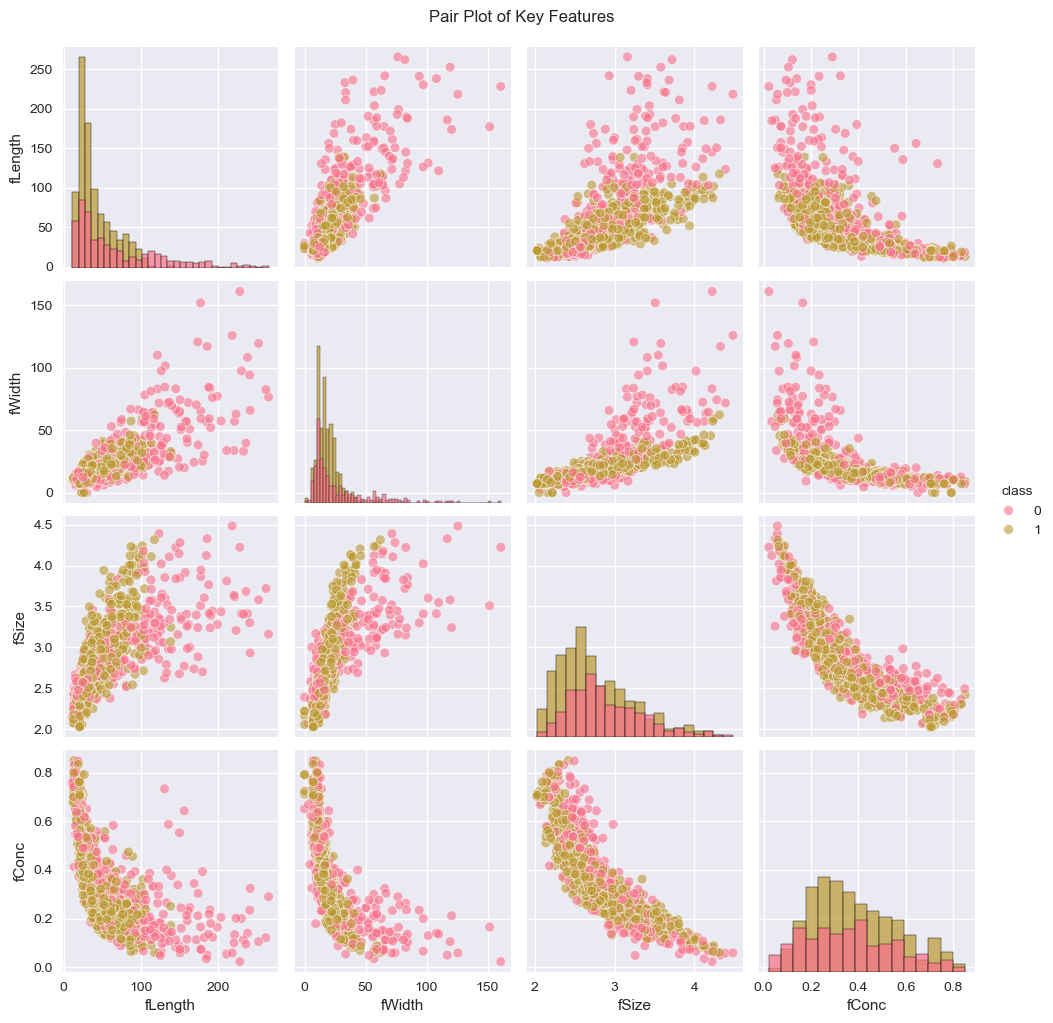

In [41]:
print("\n\n8. FEATURE RELATIONSHIPS (PAIR PLOTS)")
print("=" * 50)

# Create pair plot (sample subset of features for readability)
important_features = ['fLength', 'fWidth', 'fSize', 'fConc', 'class']
sample_df = df[important_features].sample(n=min(1000, len(df)))  # Sample for speed

sns.pairplot(sample_df, hue='class', diag_kind='hist', 
             plot_kws={'alpha': 0.6}, diag_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

# 9. Feature Importance Analysis



9. BASIC FEATURE IMPORTANCE ANALYSIS
Features ranked by correlation with target:


fAlpha      0.460979
fLength     0.307572
fWidth      0.265596
fM3Long     0.193409
fAsym       0.173587
fSize       0.117795
fDist       0.065203
fConc       0.024615
fConc1      0.004797
fM3Trans    0.003837
Name: class, dtype: float64

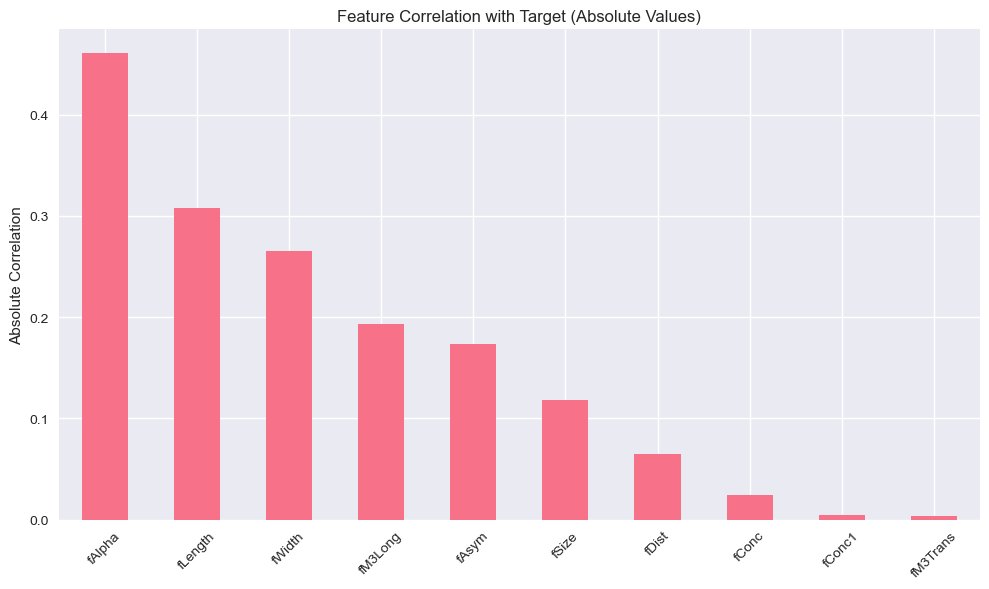

In [42]:
print("\n\n9. BASIC FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Calculate correlation with target
target_correlation = df.corr()['class'].abs().sort_values(ascending=False)
print("Features ranked by correlation with target:")
display(target_correlation.drop('class'))

# Visualize feature importance
plt.figure(figsize=(10, 6))
target_correlation.drop('class').plot(kind='bar')
plt.title('Feature Correlation with Target (Absolute Values)')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10. Key Insights Summary

In [43]:
print("\n\n10. KEY INSIGHTS SUMMARY")
print("=" * 50)

print("Dataset Characteristics:")
print(f"• Total samples: {len(df)}")
print(f"• Features: {len(feature_cols)}")
print(f"• Class imbalance ratio: {class_counts[1]/class_counts[0]:.2f}")
print(f"• Missing values: {df.isnull().sum().sum()}")

print(f"\nMost important features (by correlation):")
top_features = target_correlation.drop('class').head(3)
for feature, corr in top_features.items():
    print(f"• {feature}: {corr:.3f}")

print(f"\nFeatures with most outliers:")
top_outlier_features = outlier_df.nlargest(3, 'Outlier Percentage')
for _, row in top_outlier_features.iterrows():
    print(f"• {row['Feature']}: {row['Outlier Percentage']:.1f}% outliers")



10. KEY INSIGHTS SUMMARY
Dataset Characteristics:
• Total samples: 19020
• Features: 10
• Class imbalance ratio: 1.84
• Missing values: 0

Most important features (by correlation):
• fAlpha: 0.461
• fLength: 0.308
• fWidth: 0.266

Features with most outliers:
• fAsym: 9.4% outliers
• fWidth: 8.1% outliers
• fM3Long: 6.4% outliers
